# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Raihan Al Fuady
- **Email:** mr.alfuady@gmail.com
- **ID Dicoding:** [Muhammad Raihan Al Fuady](https://www.dicoding.com/users/mralfuady/academies)

## Menentukan Pertanyaan Bisnis


Specific:
* Apa pengaruh suhu terhadap jumlah peminjaman sepeda?

Measurable:
* Bagaimana korelasi antara kecepatan angin dan jumlah peminjaman sepeda?

Action-oriented:
* Bagaimana cara meningkatkan jumlah peminjaman sepeda pada hari libur?

Relevant:
* Bagaimana cuaca mempengaruhi keputusan orang untuk menggunakan sepeda sebagai alat transportasi?

Time-bound:
* Berapa banyak pengguna sepeda yang biasanya terdaftar di sistem pada bulan-bulan tertentu?

## Import Semua Packages/Library yang Digunakan

In [4]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [5]:
df_day = pd.read_csv("Data Set/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> Data diatas sulit dibaca, karena masih berbentuk integer. Mungkin jika dirubah menjadi string akan lebih mudah dibaca. Terutama bagian season, month, weekday, bisa dirubah sesuai representivenya masing masing.

### Assessing Data

**1. Data Type**

In [6]:
print('Dataframe day:')
print(df_day.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Dapat dilihat pada data, terdapat kesalahan pada kolom *(dteday)*. Kesalahan berupa data type yang harusnya data date time, akan tetapi disini berbentuk object.

**2. Missing Value**

In [7]:
print('Dataframe day:')
print(df_day.isna().sum())


Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Fyuuh.. Tidak ada nilai hilang dalam dataset df_day dan df_hour.

**3. Duplicate Data**

In [8]:
print('Dataframe day:', df_day.duplicated().sum())

Dataframe day: 0


Horeee... Tidak ada nilai yang terduplikasi.

**4. Descriptive statistics**

In [9]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
print(df_day.shape)

(731, 16)


**Ringkasan Data Rental Sepeda**
> Dataset Harian:

* Jumlah data: 731 entri
* Musim: Musim panas (season 2) paling umum
* Tahun: 2012 (yr = 1) paling dominan
* Bulan: Juli (mnth 7) paling sering muncul
* Hari libur: Hanya sekitar 2.87%
* Hari kerja: Mayoritas (sekitar 68.40%)
* Cuaca: Rata-rata baik (weathersit 1)
* Suhu: Rata-rata 0.50 (41°C), dengan suhu perasaan rata-rata 0.47 (50°C)
* Kelembaban: Rata-rata 0.47 (47%)
* Kecepatan angin: Rata-rata 0.63 (67% dari maksimal)
* Pengguna casual: Rata-rata 848
* Pengguna terdaftar: Rata-rata 3656
* Total rental: Rata-rata 4504 per hari


### Cleaning Data

> **Merubah data type "dteday"**

In [11]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [12]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> **Mengkoreksi nilai dari variabel season, weekday, dan month**



In [13]:
# merubah weekday pada tabel
df_day['weekday'] = df_day['dteday'].dt.day_name()
# merubah month pada tabel
df_day['mnth'] = df_day['dteday'].dt.month_name()
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# mengganti season dari angka menjadi sesuai representasinya
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df_day['season']:
    season = find_season(season)
    season_list.append(season)

df_day['season'] = season_list
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explorasi Data df_day ...

> **1. Suhu terhadap jumlah penyewa sepeda tiap bulan**



In [15]:

df_day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean'],
    'temp': ['max', 'min', 'mean'],
})


cnt                         temp                    
            max   min         mean       max       min      mean
mnth                                                            
April      7460   795  4484.900000  0.664167  0.300000  0.469999
August     7865  1115  5664.419355  0.793333  0.635833  0.708582
December   6606   441  3403.806452  0.475833  0.215833  0.324031
February   5062  1005  2655.298246  0.521667  0.127500  0.299226
January    4521   431  2176.338710  0.425000  0.059130  0.236444
July       8173  3285  5563.677419  0.861667  0.595833  0.755470
June       8120  3767  5772.366667  0.834167  0.540833  0.684097
March      8362   605  3692.258065  0.601667  0.198333  0.390539
May        8294  2633  5349.774194  0.775000  0.414167  0.594798
November   6852  1495  4247.183333  0.530000  0.245833  0.369220
October    8156    22  5199.225806  0.657500  0.254167  0.485012
September  8714  1842  5766.516667  0.753333  0.469167  0.616485

> Dapat disimpulkan bahwasannya perbedaan suhu mempengaruhi jumlah penenyewa sepeda, mereka lebih suka bersepeda ketika cuacanya hangat. Hal tersebut dari meningkatnya suhu, jumlah penyewa sepeda juga meningkat.

> **2.Jumlah penyewa sepeda ( casual dan registered) berdasarkan season**

In [16]:
df_day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall     729.112360  3999.050562  8555    22  4728.162921
Spring  1106.097826  3886.233696  8362   795  4992.331522
Summer  1202.611702  4441.691489  8714  1115  5644.303191
Winter   334.928177  2269.204420  7836   431  2604.132597

> Dapat dilihat, para penyewa sepeda baik Casual Dan Registered, sangat suka saat musim panas (Summer), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim salju (Winter) dengan rata-rata yang paling kecil.

> **3. Kecepatan Angin terhadap jumlah penyewa sepeda**

In [17]:
df_day.groupby(by='season').agg({
    'windspeed': 'mean',
    'cnt': ['max', 'min', 'mean']
})

windspeed   cnt                   
            mean   max   min         mean
season                                   
Fall    0.171995  8555    22  4728.162921
Spring  0.203507  8362   795  4992.331522
Summer  0.172095  8714  1115  5644.303191
Winter  0.214537  7836   431  2604.132597

> Dapat dilihat bahwasannya Penyewa sepeda lebih suka ketika kecepatan angin tidak begitu tinggi.

>**4. Jumlah penyewa sepeda ketika holyday**

In [18]:
df_day.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean'],
})


cnt                   
            max   min         mean
weekday                           
Friday     8362  1167  4690.288462
Monday     7525    22  4338.123810
Saturday   8714   627  4550.542857
Sunday     8227   605  4228.828571
Thursday   7804   431  4667.259615
Tuesday    7767   683  4510.663462
Wednesday  8173   441  4548.538462

> Dapat dilihat, bahwasannya hari yang paling ramai dikunjungi adalah hari jumat (friday), dan yang paling sepi adalah minggu (sunday)

> **5. Jumlah penyewa sepeda ketika holiday**

In [19]:
df_day.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean'],

})

cnt                   
          max   min         mean
holiday                         
0        8714    22  4527.104225
1        7403  1000  3735.000000

> Dapat dilihat bahwasannya jumlah penyewa terbanyak justru pada non holiday.

> **6. Jumlah penyewa sepeda terdaftar dan tidak terdaftar pada tiap bulan.**

In [20]:
df_day.groupby(by='mnth').agg({
    'casual': ['max', 'min', 'mean'],
    'registered': ['max', 'min', 'mean'],
})

casual                   registered                   
             max  min         mean        max   min         mean
mnth                                                            
April       3252  120  1013.366667       5950   674  3471.533333
August      2827  226  1161.919355       6541   889  4502.500000
December    1153    9   349.887097       6055   432  3053.919355
February    1435   47   262.508772       4546   905  2392.789474
January     1070    9   194.225806       4185   416  1982.112903
July        3065  562  1260.596774       6790  2298  4303.080645
June        2963  477  1231.766667       6456  2993  4540.600000
March       3155   46   716.838710       5893   491  2975.419355
May         3410  255  1214.274194       6433  2213  4135.500000
November    2290   69   610.050000       5520   935  3637.133333
October     3031    2   963.870968       6911    20  4235.354839
September   3160  118  1172.050000       6946  1689  4594.466667

> Dapat dilihat bahwasannya lebih banyak pengguna yang sudah terdaftar dibandingkan yang belum terdaftar. Pengguna terdaftar paling banyak pada bulan September, dan paling sedikit pada bulan Januari. Untuk pengguna yang belum terdaftar paling banyak pada bulan Juli, dan paling sedikit pada bulan Januari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa pengaruh suhu terhadap jumlah peminjaman sepeda?


Text(0.5, 1.0, 'Pengaruh Suhu Terhadap Jumlah Peminjaman Sepeda')

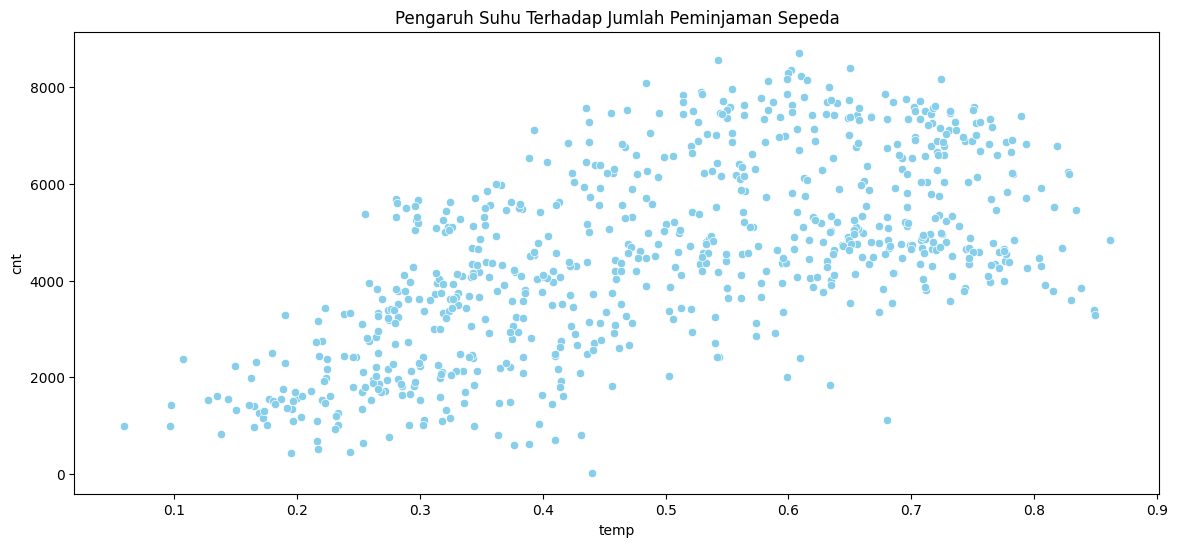

In [21]:

plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='temp',
    y='cnt',
    color='skyblue',
    data=df_day,

)
plt.title('Pengaruh Suhu Terhadap Jumlah Peminjaman Sepeda')

Dapat disimpulkan bahwasannya Suhu memiliki pengaruh positif terhadap jumlah penyewa sepeda.

### Pertanyaan 2: Bagaimana korelasi antara kecepatan angin dan jumlah peminjaman sepeda?

Text(0.5, 1.0, 'Korelasi Antara Kecepatan Angin dan Jumlah Peminjaman Sepeda')

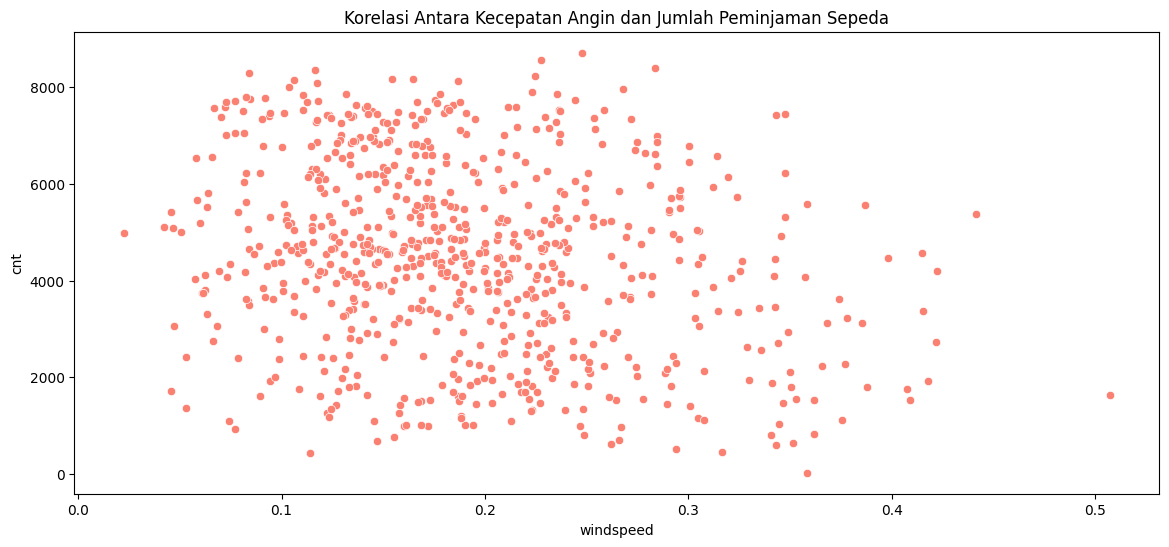

In [22]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='windspeed',
    y='cnt',
    color='salmon',
    data=df_day,

)
plt.title('Korelasi Antara Kecepatan Angin dan Jumlah Peminjaman Sepeda')

Dapat disimpulkan bahwasannya tidak adanya korelasi yang jelas antara kecepatan angin dan jumlah peminjaman sepeda.



## Pertanyaan 3: Bagaimana cara meningkatkan jumlah peminjaman sepeda pada hari libur?

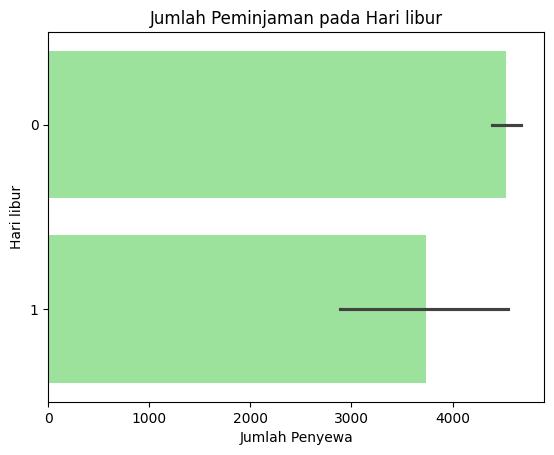

In [23]:
sns.barplot(y=df_day["holiday"], x=df_day["cnt"], orient="h", color='lightgreen')
plt.xlabel("Jumlah Penyewa")
plt.ylabel("Hari libur")
plt.title("Jumlah Peminjaman pada Hari libur")
plt.show()

Dapat disimpulkan bahwasanya jumlah peminjaman sepeda pada hari libur lebih sedikit ketimbang hari biasa.
Hal tersebut dapat ditingkatkan dengan :
* Melakukan promosi khusus pada hari libur, dengan memberikan diskon harga.
* Mengadakan Event menarik pada hari libur, dengan Membuat Event Perayaan Hari Besar.
* Kolaborasi dengan mitra Pariwisata.




## Pertanyaan 4: Bagaimana cuaca mempengaruhi keputusan orang untuk menggunakan sepeda sebagai alat transportasi?

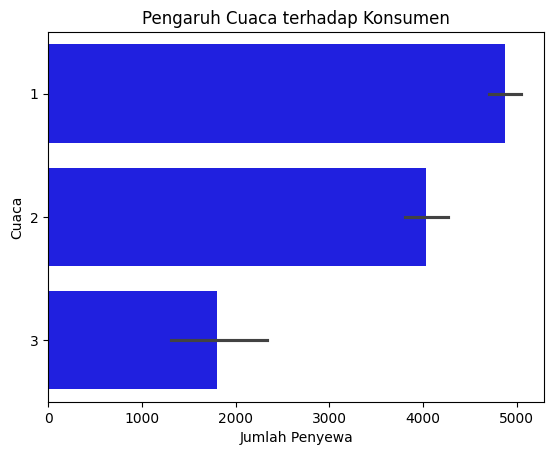

In [24]:
sns.barplot(y=df_day["weathersit"], x=df_day["cnt"], orient="h", color='blue')
plt.xlabel("Jumlah Penyewa")
plt.ylabel("Cuaca")
plt.title("Pengaruh Cuaca terhadap Konsumen")
plt.show()

Informasi :
1. Cerah, Sedikit awan, Berawan sebagian
2. Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3. Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan

Dapat disimpulkan bahwa cuaca mempengaruhi keputusan orang untuk menggunakan sepeda sebagai alat transportasi. Semakin bagus cuaca, semakin banyak orang yang menggunakan sepeda.

## Pertanyaan 5: Berapa banyak pengguna sepeda yang biasanya terdaftar di sistem pada bulan-bulan tertentu?

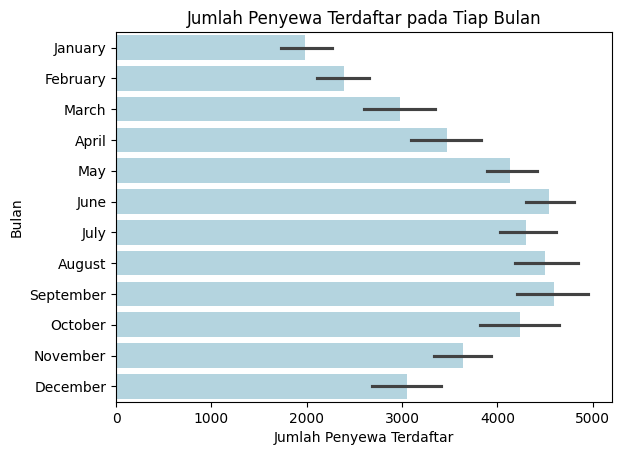

In [25]:
sns.barplot(y=df_day["mnth"], x=df_day["registered"], orient="h", color='lightblue')
plt.xlabel("Jumlah Penyewa Terdaftar")
plt.ylabel("Bulan")
plt.title("Jumlah Penyewa Terdaftar pada Tiap Bulan")
plt.show()

Dapat disimpulan bahwa pengguna terdaftar paling banyak menyewa pada bulan September, dan paling sedikit pada bulan Januari.

## Conclusion

Hasil Akhir:
> Suhu dan Kecepatan Angin Berpengaruh:
* Semakin panas suhu, semakin banyak orang menyewa sepeda.
* Kecepatan angin tidak berhubungan dengan peminjaman sepeda.

> Meningkatkan Peminjaman Sepeda saat Libur:
* Diskon khusus di hari libur.
* Acara menarik di Hari Besar dan kerjasama dengan mitra Pariwisata.

> Dampak Cuaca:
* Cuaca baik mendorong penggunaan sepeda.
* Cuaca buruk dapat mengurangi penggunaan sepeda.

> Jumlah Pengguna Terdaftar per Bulan:
* Puncak terjadi di bulan September. Sedangkan pendaftaran terendah adalah pada bulan Januari.